# Descriptive Analysis: Exam Results

In [1]:
# Import Dependencies
%matplotlib inline

# Begin Python Imports
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
# Import data for exam results from Excel

result1 = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 1')
result2 = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 2')
result3 = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 3')
result4 = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 4')
result5 = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 5')
result6 = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 6')
result7 = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 7')
result8 = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 8')
result9 = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 9')

In [3]:
# Drop some columns for Batch 6 and display its results

result6.drop(['Q1', 'Q2', 'Q3'], axis = 1, inplace = True)
result6.head()

,Semester,Session,Batch,Roll No.,Assignment,Midterm,Ori Online Participation,Online Participation,Ori Group Project,Group Project,COURSEWORK,Alternative Assessment 01,Alternative Assessment 02,FINALS,TOTAL MARKS,GRADE
0,2,2019/2020,6,1.,9.0,16.00,9,9,17,17,51.00,17.0,17.0,34.0,85.00,NaN
1,2,2019/2020,6,2.,9.0,17.34,10,10,17,17,53.34,13.5,18.5,32.0,85.34,NaN
2,2,2019/2020,6,3.,10.0,18.00,9,9,17,17,54.00,17.0,18.0,35.0,89.00,NaN
3,2,2019/2020,6,4.,0.0,9.33,4,4,14,14,27.33,11.5,11.5,23.0,50.33,NaN
4,2,2019/2020,6,5.,10.0,16.67,10,10,17,17,53.67,17.5,16.5,34.0,87.67,NaN


In [4]:
# Append data from Batch 1 till 9

result = pd.concat([result1, result2, result3, result4, result5, result6, result7, result8, result9], 
                    ignore_index = True, sort = False)

result.head()

,Semester,Session,Batch,Roll No.,Assignment,Midterm,Ori Online Participation,Online Participation,Ori Group Project,Group Project,COURSEWORK,Alternative Assessment 01,Alternative Assessment 02,FINALS,TOTAL MARKS,GRADE
0,1,2017/2018,1,WQD170001,8.0,14.67,10.0,10.0,14.0,14.0,46.67,NaN,NaN,33.6,80.27,A
1,1,2017/2018,1,WQD170002,7.0,13.33,10.0,10.0,18.0,18.0,48.33,NaN,NaN,25.6,73.93,B+
2,1,2017/2018,1,WQD170008,7.0,16.33,10.0,10.0,15.0,15.0,48.33,NaN,NaN,34.4,82.73,A
3,1,2017/2018,1,WQD170013,7.0,14.67,10.0,10.0,15.0,15.0,46.67,NaN,NaN,36.8,83.47,A
4,1,2017/2018,1,WQD170014,7.0,16.67,10.0,10.0,15.0,15.0,48.67,NaN,NaN,35.2,83.87,A


In [5]:
# Convert data type for some numerical columns to categorical columns

result['Semester'] = result['Semester'].astype(str)
result['Batch'] = result['Batch'].astype(str)

result.dtypes

Semester                      object
Session                       object
Batch                         object
Roll No.                      object
Assignment                   float64
Midterm                      float64
Ori Online Participation     float64
Online Participation         float64
Ori Group Project            float64
Group Project                float64
COURSEWORK                   float64
Alternative Assessment 01    float64
Alternative Assessment 02    float64
FINALS                       float64
TOTAL MARKS                  float64
GRADE                         object
dtype: object

In [6]:
# Rounding some columns to one decimal place

result = result.round({"Midterm" : 1, "Group Project" : 1, "COURSEWORK" : 1, "FINALS" : 1, "TOTAL MARKS" :1})
result.head()

,Semester,Session,Batch,Roll No.,Assignment,Midterm,Ori Online Participation,Online Participation,Ori Group Project,Group Project,COURSEWORK,Alternative Assessment 01,Alternative Assessment 02,FINALS,TOTAL MARKS,GRADE
0,1,2017/2018,1,WQD170001,8.0,14.7,10.0,10.0,14.0,14.0,46.7,NaN,NaN,33.6,80.3,A
1,1,2017/2018,1,WQD170002,7.0,13.3,10.0,10.0,18.0,18.0,48.3,NaN,NaN,25.6,73.9,B+
2,1,2017/2018,1,WQD170008,7.0,16.3,10.0,10.0,15.0,15.0,48.3,NaN,NaN,34.4,82.7,A
3,1,2017/2018,1,WQD170013,7.0,14.7,10.0,10.0,15.0,15.0,46.7,NaN,NaN,36.8,83.5,A
4,1,2017/2018,1,WQD170014,7.0,16.7,10.0,10.0,15.0,15.0,48.7,NaN,NaN,35.2,83.9,A


In [7]:
# Establish a grade logic for grade column based on "Total Marks"

def grade_func(marks):
    if marks >= 90:
        grade = 'A+' 
    elif marks >= 80 and marks < 90:
        grade = 'A'
    elif marks >= 75 and marks < 80:
        grade = 'A-'
    elif marks >= 70 and marks < 75:
        grade = 'B+'
    elif marks >= 65 and marks < 70:
        grade = 'B'
    elif marks >= 60 and marks < 65:
        grade = 'B-'
    elif marks >= 55 and marks < 60:
        grade = 'C+'
    elif marks >= 50 and marks < 55:
        grade = 'C'
    elif marks >= 45 and marks < 50:
        grade = 'C-'
    elif marks >= 40 and marks < 45:
        grade = 'D+'
    elif marks >= 35 and marks < 40:
        grade = 'D'
    else:
        grade = 'F'
    return grade

result['GRADE'] = result.apply(lambda x: grade_func(x['TOTAL MARKS']), axis = 1)

In [8]:
# Establish a "Student Roll Number" based on row sequence

result['Roll No.'] = np.arange(len(result)) + 1

def number_func(num):
    if num < 10:
        num2 = "00" + str(num)
    elif num >= 10 and num < 100:
        num2 = "0" + str(num)
    else:
        num2 = str(num)
    return num2

result['Roll No.'] = "PDS" + result.apply(lambda x: number_func(x['Roll No.']), axis = 1)
result.head()

,Semester,Session,Batch,Roll No.,Assignment,Midterm,Ori Online Participation,Online Participation,Ori Group Project,Group Project,COURSEWORK,Alternative Assessment 01,Alternative Assessment 02,FINALS,TOTAL MARKS,GRADE
0,1,2017/2018,1,PDS001,8.0,14.7,10.0,10.0,14.0,14.0,46.7,NaN,NaN,33.6,80.3,A
1,1,2017/2018,1,PDS002,7.0,13.3,10.0,10.0,18.0,18.0,48.3,NaN,NaN,25.6,73.9,B+
2,1,2017/2018,1,PDS003,7.0,16.3,10.0,10.0,15.0,15.0,48.3,NaN,NaN,34.4,82.7,A
3,1,2017/2018,1,PDS004,7.0,14.7,10.0,10.0,15.0,15.0,46.7,NaN,NaN,36.8,83.5,A
4,1,2017/2018,1,PDS005,7.0,16.7,10.0,10.0,15.0,15.0,48.7,NaN,NaN,35.2,83.9,A


In [9]:
# Display the statistics for numerical columns
result.describe()

,Assignment,Midterm,Ori Online Participation,Online Participation,Ori Group Project,Group Project,COURSEWORK,Alternative Assessment 01,Alternative Assessment 02,FINALS,TOTAL MARKS
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,249.000000,249.000000,504.000000,504.000000
mean,7.682540,15.027976,10.479167,9.197421,14.498095,15.779960,47.688492,14.929719,13.544177,28.234524,75.930357
std,1.759499,2.666766,2.821268,1.743338,3.185682,2.909519,6.507129,3.073049,3.811069,6.499570,11.673598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,13.600000,9.000000,9.000000,12.800000,15.000000,45.800000,13.000000,12.000000,25.000000,72.000000
50%,8.000000,15.250000,10.000000,10.000000,15.000000,16.200000,48.550000,15.000000,14.000000,29.500000,78.200000
75%,9.000000,16.800000,10.000000,10.000000,17.000000,17.500000,51.400000,17.000000,16.000000,33.000000,82.800000
max,10.000000,20.000000,15.000000,10.000000,19.330000,19.300000,56.900000,20.000000,20.000000,39.000000,92.300000


In [10]:
# Check for any missing data

def checkMissing(data, perc = 0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns = ["Column Name", "Proportion"])
    missing = missing[missing.Proportion > perc]
    print(missing.sort_values("Proportion", ascending = False).reset_index(drop = True))

checkMissing(result)

                 Column Name  Proportion
0  Alternative Assessment 01   50.595238
1  Alternative Assessment 02   50.595238


In [11]:
# Check for duplicated entries
result.duplicated().sum()

0

In [12]:
# Transform table for area chart
          
result_01 = result[result['GRADE'] == "A"].groupby(['Batch', 'Semester', 'Session'], as_index = False).agg({"Roll No.": "count"})
result_01.rename(columns = {'Roll No.' : 'Frequency'}, inplace = True)

result_01

,Batch,Semester,Session,Frequency
0,1,1,2017/2018,17
1,2,2,2017/2018,15
2,3,1,2018/2019,24
3,4,2,2018/2019,14
4,5,1,2019/2020,25
5,6,2,2019/2020,37
6,7,1,2020/2021,35
7,8,2,2020/2021,27
8,9,1,2021/2022,26


In [13]:
# Transform table for histogram

result_02 = result[['Semester', 'Session', 'Batch', 'TOTAL MARKS', 'COURSEWORK', 'FINALS', 'Assignment', 'Midterm', 'Online Participation', 
                    'Group Project', 'Alternative Assessment 01', 'Alternative Assessment 02']]

result_02.rename(columns = {'TOTAL MARKS' : 'All Assessments', 'COURSEWORK' : 'Coursework', 'FINALS' : 'Finals'}, inplace = True)

result_02 = result_02.melt(id_vars = ['Batch', 'Semester', 'Session'], var_name = 'Assessment Type', value_name = 'Marks')
result_02

,Batch,Semester,Session,Assessment Type,Marks
0,1,1,2017/2018,All Assessments,80.3
1,1,1,2017/2018,All Assessments,73.9
2,1,1,2017/2018,All Assessments,82.7
3,1,1,2017/2018,All Assessments,83.5
4,1,1,2017/2018,All Assessments,83.9
...,...,...,...,...,...
4531,9,1,2021/2022,Alternative Assessment 02,16.0
4532,9,1,2021/2022,Alternative Assessment 02,11.0
4533,9,1,2021/2022,Alternative Assessment 02,16.0
4534,9,1,2021/2022,Alternative Assessment 02,9.0


In [14]:
# Transform table for bullet chart & filtering

result_03 = result[['Semester', 'Session', 'Batch', 'Roll No.', 'TOTAL MARKS']]
result_03[(result_03['Semester'] == "1") & (result_03['Session'] == "2017/2018") & (result_03['Roll No.'] == "PDS007")]

,Semester,Session,Batch,Roll No.,TOTAL MARKS
6,1,2017/2018,1,PDS007,77.9


In [15]:
# Transform table for radar chart

result_04 = result[['Semester', 'Session', 'Batch', 'Roll No.', 
                    'Assignment', 'Midterm', 'Online Participation', 'Group Project', 'FINALS']]

result_04.rename(columns = {'FINALS' : 'Finals'}, inplace = True)
result_04.head()

,Semester,Session,Batch,Roll No.,Assignment,Midterm,Online Participation,Group Project,Finals
0,1,2017/2018,1,PDS001,8.0,14.7,10.0,14.0,33.6
1,1,2017/2018,1,PDS002,7.0,13.3,10.0,18.0,25.6
2,1,2017/2018,1,PDS003,7.0,16.3,10.0,15.0,34.4
3,1,2017/2018,1,PDS004,7.0,14.7,10.0,15.0,36.8
4,1,2017/2018,1,PDS005,7.0,16.7,10.0,15.0,35.2


In [16]:
# Score standardization to 10 & filtering

result_04['Midterm'] = (result_04['Midterm'] / 20) * 10
result_04['Group Project'] = (result_04['Group Project'] / 20) * 10
result_04['Finals'] = (result_04['Finals'] / 40) * 10

result_04 = result_04.round({"Midterm" : 1, "Group Project" : 1, "Finals" : 1})

result_04[(result_04['Semester'] == "1") & (result_04['Session'] == "2017/2018") & (result_04['Roll No.'] == "PDS007")]

,Semester,Session,Batch,Roll No.,Assignment,Midterm,Online Participation,Group Project,Finals
6,1,2017/2018,1,PDS007,8.0,7.6,10.0,7.5,7.4


In [17]:
# Transform table for radar chart (median values)

result_05 = result_04.groupby(['Batch', 'Semester', 'Session'], 
                              as_index = False)['Assignment', 'Midterm', 'Online Participation', 
                                                'Group Project', 'Finals'].median()

result_05[(result_05['Semester'] == "1") & (result_05['Session'] == "2017/2018")]

,Batch,Semester,Session,Assignment,Midterm,Online Participation,Group Project,Finals
0,1,1,2017/2018,8.5,8.2,10.0,7.5,7.05


# Descriptive Analysis: Attendance

In [18]:
# Import data for exam results & attendance for Batch 9 from Excel
attendance = pd.read_excel('data_results_attendance.xlsx', sheet_name = 'Batch 9 - With Attendance')

In [19]:
# Replicate some pre-processing steps from "Exam Results" section

attendance = attendance.round({"Midterm" : 1, "Group Project" : 1, "COURSEWORK" : 1, "FINALS" : 1, "TOTAL MARKS" :1})
attendance['GRADE'] = attendance.apply(lambda x: grade_func(x['TOTAL MARKS']), axis = 1)
attendance['Semester'] = attendance['Semester'].astype(str)
attendance['Batch'] = attendance['Batch'].astype(str)

attendance['Attendance Rate'] = round(attendance['Attendance Rate'] * 100, 1)
attendance.head()

,Semester,Session,Batch,Roll No.,Assignment,Midterm,Ori Online Participation,Online Participation,Ori Group Project,Group Project,COURSEWORK,Alternative Assessment 01,Alternative Assessment 02,FINALS,TOTAL MARKS,GRADE,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,Total Attendance,Attendance Rate
0,1,2021/2022,9,PDS448,9.0,12,7,7,18,18,46.0,17,14,31,77.0,A-,0,1,1,1,1,0,1,1,1,1,1,1,1,1,12,85.7
1,1,2021/2022,9,PDS449,8.5,19,10,10,15,15,52.5,16,17,33,85.5,A,1,1,1,1,1,1,1,0,1,1,1,1,1,1,13,92.9
2,1,2021/2022,9,PDS450,6.5,15,5,5,16,16,42.5,12,13,25,67.5,B,1,1,1,1,0,1,1,1,1,1,1,1,1,0,12,85.7
3,1,2021/2022,9,PDS451,9.0,14,9,9,15,15,47.0,15,13,28,75.0,A-,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14,100.0
4,1,2021/2022,9,PDS452,8.0,20,10,10,17,17,55.0,18,15,33,88.0,A,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14,100.0


# Predictive Analysis: Grade Prediction

In [20]:
# Create table for prediction (All batches - exclude attendance & alternative assessments)
predict_01 = result[['Assignment', 'Midterm', 'Online Participation', 'Group Project', 'FINALS', 'TOTAL MARKS']]

# Create table for prediction (Batch 6 till 9 only - exclude attendance)
predict_02 = result[result['Batch'].isin(['6', '7', '8', '9'])]
predict_02 = predict_02[['Assignment', 'Midterm', 'Online Participation', 'Group Project', 
                         'Alternative Assessment 01', 'Alternative Assessment 02', 'FINALS', 'TOTAL MARKS']]

# Create table for prediction (Batch 9 only)
predict_03 = attendance[['Assignment', 'Midterm', 'Online Participation', 'Group Project', 
                         'Alternative Assessment 01', 'Alternative Assessment 02', 'FINALS',
                         'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14',
                         'Attendance Rate', 'TOTAL MARKS']]

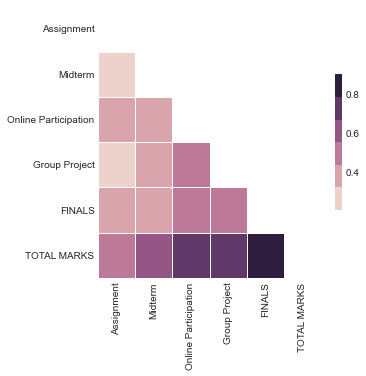

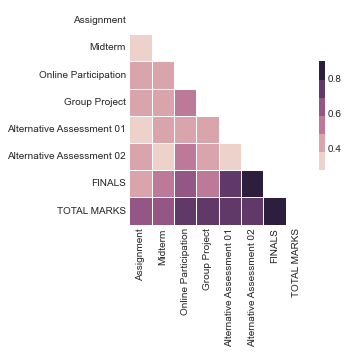

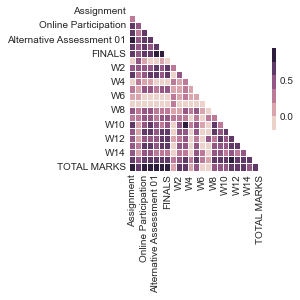

In [21]:
# Correlation matrix for "predict_01" table
corr = predict_01.corr()
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(5,5))
sns.heatmap(corr, fmt=".2f", cmap = sns.cubehelix_palette(), mask=mask, linewidths = .5, cbar_kws = {"shrink": .5})
plt.show()

# Correlation matrix for "predict_02" table
corr2 = predict_02.corr()
mask = np.zeros_like(corr2, dtype = bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(4,4))
sns.heatmap(corr2, fmt=".2f", cmap = sns.cubehelix_palette(), mask=mask, linewidths = .5, cbar_kws = {"shrink": .5})
plt.show()

# Correlation matrix for "predict_03" table
corr3 = predict_03.corr()
mask = np.zeros_like(corr3, dtype = bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(3,3))
sns.heatmap(corr3, fmt=".2f", cmap = sns.cubehelix_palette(), mask=mask, linewidths = .5, cbar_kws = {"shrink": .5})
plt.show()

In [22]:
# Correlation matrix for all versions in terms of "Total Marks"

corr_marks = pd.DataFrame([predict_01.corr().loc['TOTAL MARKS'], predict_02.corr().loc['TOTAL MARKS'], 
                                 predict_03.corr().loc['TOTAL MARKS']]).T

corr_marks.columns = ['Correlation (v0)', 'Correlation (v1)', 'Correlation (v2)']
corr_marks

,Correlation (v0),Correlation (v1),Correlation (v2)
Assignment,0.534315,0.613285,0.808705
Midterm,0.615626,0.684534,0.611156
Online Participation,0.686688,0.772506,0.827586
Group Project,0.714384,0.731617,0.815802
FINALS,0.899178,0.895017,0.942071
TOTAL MARKS,1.000000,1.000000,1.000000
Alternative Assessment 01,NaN,0.702804,0.888997
Alternative Assessment 02,NaN,0.762884,0.844842
W1,NaN,NaN,0.035993
W2,NaN,NaN,0.640443


In [23]:
# Choose to proceed with "predict_02" table and drop some columns from it

predict_02.drop(['Group Project', 'Alternative Assessment 02', 'FINALS'], axis = 1, inplace = True)

In [24]:
# Import library for splitting & evaluation
from sklearn.model_selection import KFold, cross_val_score, cross_validate, GridSearchCV

# Define cross validation method
kfold = KFold(n_splits = 10, random_state = 3, shuffle = True) 

# Split data into target variable & non-target variables
Y = predict_02['TOTAL MARKS']
X = predict_02.drop(['TOTAL MARKS'], axis =1)

In [25]:
# Import library for scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X = pd.DataFrame(scaler.fit_transform(X))

In [26]:
# Import library for linear regression
from sklearn.linear_model import LinearRegression

# Define model & perform prediction
model_lin = LinearRegression().fit(X, Y)

# Compute RMSE score & display it
score_lin = cross_val_score(model_lin, X, Y, scoring = 'neg_root_mean_squared_error', cv = kfold, n_jobs = -1)
score_lin = np.mean(np.absolute(score_lin))
print('RMSE:', round(score_lin, 4))

RMSE: 4.0982


In [27]:
# Import library for support vector regression
from sklearn.svm import SVR

# Define model & perform prediction
model_svr = SVR().fit(X, Y)

# Compute RMSE score & display it
score_svr = cross_val_score(model_svr, X, Y, scoring = 'neg_root_mean_squared_error', cv = kfold, n_jobs = -1)
score_svr = np.mean(np.absolute(score_svr))
print('RMSE:', round(score_svr, 4))

RMSE: 7.859


In [28]:
# Import library for random forest
from sklearn.ensemble import RandomForestRegressor


# Search for best parameter
model_rf = RandomForestRegressor(random_state = 3)
param_dict = {"n_estimators": range(10,200,10), "max_depth": range(1,10)}

grid_rf = GridSearchCV(model_rf, param_grid = param_dict, scoring = 'neg_root_mean_squared_error', cv = kfold, n_jobs = -1)
grid_rf.fit(X, Y)
grid_rf.best_params_

{'max_depth': 8, 'n_estimators': 160}

In [29]:
# Define model & perform prediction
model_rf = RandomForestRegressor(n_estimators = 160, max_depth = 8, random_state = 3).fit(X, Y)

# Compute RMSE score & display it
score_rf = cross_val_score(model_rf, X, Y, scoring = 'neg_root_mean_squared_error', cv = kfold, n_jobs = -1)
score_rf = np.mean(np.absolute(score_rf))
print('RMSE:', round(score_rf, 4))

RMSE: 4.2652


In [30]:
# Import library for kNN Regression
from sklearn.neighbors import KNeighborsRegressor


# Search for best parameter
model_knn = KNeighborsRegressor()
param_dict = {"n_neighbors": range(1,20)}

grid_knn = GridSearchCV(model_knn, param_grid = param_dict, scoring = "neg_root_mean_squared_error", cv = kfold, n_jobs = -1)
grid_knn.fit(X, Y)
grid_knn.best_params_

{'n_neighbors': 2}

In [31]:
# Define model & perform prediction
model_knn = KNeighborsRegressor(n_neighbors = 2).fit(X, Y)

# Compute RMSE score & display it
score_knn = cross_val_score(model_knn, X, Y, scoring = 'neg_root_mean_squared_error', cv = kfold, n_jobs = -1)
score_knn = np.mean(np.absolute(score_knn))
print('RMSE:', round(score_knn, 4))

RMSE: 4.8771


In [32]:
# Import library for MLP from Neural Network
from sklearn.neural_network import MLPRegressor


# Search for best parameter
model_mlp = MLPRegressor(activation = "relu", random_state = 3)
param_dict = {"hidden_layer_sizes": range(1,10), "alpha": [x/10000 for x in range(1,10)], 
              "learning_rate_init": [x/10 for x in range(1,50,5)]}

grid_mlp = GridSearchCV(model_mlp, param_grid = param_dict, scoring = "neg_root_mean_squared_error", cv = kfold, n_jobs = -1)
grid_mlp.fit(X, Y)
grid_mlp.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': 9, 'learning_rate_init': 1.6}

In [33]:
# Define model & perform prediction
model_mlp = MLPRegressor(hidden_layer_sizes = (9,), activation = "relu", alpha = 0.0001,
                         learning_rate_init = 1.6, random_state = 3).fit(X, Y)

# Compute RMSE score & display it
score_mlp = cross_val_score(model_mlp, X, Y, scoring = 'neg_root_mean_squared_error', cv = kfold, n_jobs = -1)
score_mlp = np.mean(np.absolute(score_mlp))
print('RMSE:', round(score_mlp, 4))

RMSE: 4.0591


In [34]:
# Accuracy of grade prediction in Linear Regression

Y_pred_lin = model_lin.predict(X)

predict_02A = predict_02
predict_02A['Predicted Marks'] = Y_pred_lin.tolist()
predict_02A['GRADE'] = predict_02A.apply(lambda x: grade_func(x['TOTAL MARKS']), axis = 1)
predict_02A['Predicted Grade'] = predict_02A.apply(lambda x: grade_func(x['Predicted Marks']), axis = 1)

accuracy_lin = len(np.where((predict_02A['GRADE'] == predict_02A['Predicted Grade']))[0])/len(predict_02A)
print('Accuracy:', round(accuracy_lin, 4))

Accuracy: 0.6064


In [35]:
# Accuracy of grade prediction in SVR

Y_pred_svr = model_svr.predict(X)

predict_02A = predict_02
predict_02A['Predicted Marks'] = Y_pred_svr.tolist()
predict_02A['GRADE'] = predict_02A.apply(lambda x: grade_func(x['TOTAL MARKS']), axis = 1)
predict_02A['Predicted Grade'] = predict_02A.apply(lambda x: grade_func(x['Predicted Marks']), axis = 1)

accuracy_svr = len(np.where((predict_02A['GRADE'] == predict_02A['Predicted Grade']))[0])/len(predict_02A)
print('Accuracy:', round(accuracy_svr, 4))

Accuracy: 0.6506


In [36]:
# Accuracy of grade prediction in Random Forest

Y_pred_rf = model_rf.predict(X)

predict_02A = predict_02
predict_02A['Predicted Marks'] = Y_pred_rf.tolist()
predict_02A['GRADE'] = predict_02A.apply(lambda x: grade_func(x['TOTAL MARKS']), axis = 1)
predict_02A['Predicted Grade'] = predict_02A.apply(lambda x: grade_func(x['Predicted Marks']), axis = 1)

accuracy_rf = len(np.where((predict_02A['GRADE'] == predict_02A['Predicted Grade']))[0])/len(predict_02A)
print('Accuracy:', round(accuracy_rf, 4))

Accuracy: 0.759


In [37]:
# Accuracy of grade prediction in kNN

Y_pred_knn = model_knn.predict(X)

predict_02A = predict_02
predict_02A['Predicted Marks'] = Y_pred_knn.tolist()
predict_02A['GRADE'] = predict_02A.apply(lambda x: grade_func(x['TOTAL MARKS']), axis = 1)
predict_02A['Predicted Grade'] = predict_02A.apply(lambda x: grade_func(x['Predicted Marks']), axis = 1)

accuracy_knn = len(np.where((predict_02A['GRADE'] == predict_02A['Predicted Grade']))[0])/len(predict_02A)
print('Accuracy:', round(accuracy_knn, 4))

Accuracy: 0.743


In [38]:
# Accuracy of grade prediction in MLP

Y_pred_mlp = model_mlp.predict(X)

predict_02A = predict_02
predict_02A['Predicted Marks'] = Y_pred_mlp.tolist()
predict_02A['GRADE'] = predict_02A.apply(lambda x: grade_func(x['TOTAL MARKS']), axis = 1)
predict_02A['Predicted Grade'] = predict_02A.apply(lambda x: grade_func(x['Predicted Marks']), axis = 1)

accuracy_mlp = len(np.where((predict_02A['GRADE'] == predict_02A['Predicted Grade']))[0])/len(predict_02A)
print('Accuracy:', round(accuracy_mlp, 4))

Accuracy: 0.6305


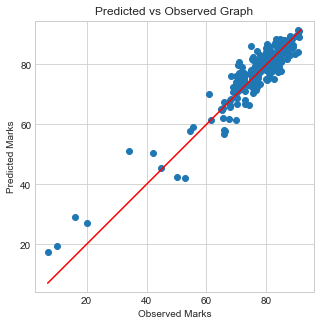

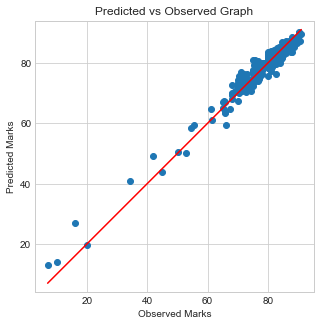

In [39]:
# Plot predicted vs observed marks for MLP & RF

# MLP
plt.figure(figsize = (5,5))
plt.scatter(Y, Y_pred_mlp)
p1 = max(max(Y_pred_mlp), max(Y))
p2 = min(min(Y_pred_mlp), min(Y))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Observed Marks')
plt.ylabel('Predicted Marks')
plt.title('Predicted vs Observed Graph')
plt.axis('equal')
plt.show()


# RF
plt.figure(figsize = (5,5))
plt.scatter(Y, Y_pred_rf)
p1 = max(max(Y_pred_rf), max(Y))
p2 = min(min(Y_pred_rf), min(Y))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Observed Marks')
plt.ylabel('Predicted Marks')
plt.title('Predicted vs Observed Graph')
plt.axis('equal')
plt.show()

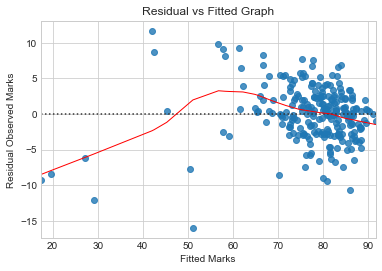

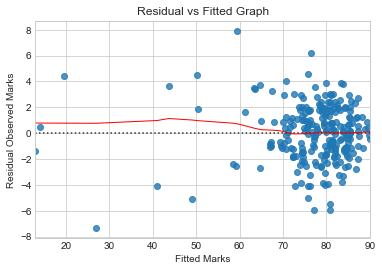

In [40]:
# Plot residual vs fitted graph for MLP & RF

# MLP
sns.residplot(Y_pred_mlp.reshape(-1), Y, lowess = True, line_kws = {'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted Marks")
plt.ylabel("Residual Observed Marks")
plt.title('Residual vs Fitted Graph')
plt.show()


# RF
sns.residplot(Y_pred_rf.reshape(-1), Y, lowess = True, line_kws = {'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted Marks")
plt.ylabel("Residual Observed Marks")
plt.title('Residual vs Fitted Graph')
plt.show()

In [41]:
# Load a fresh new dataset for prediction
new_result = pd.read_excel('data_results_new_batch.xlsx')
new_result.head()

,Roll No.,Assignment,Midterm,Online Participation,Alternative Assessment 01
0,1,9.0,14.33,10.0,18.0
1,2,9.0,16.67,10.0,14.0
2,3,8.0,17.00,10.0,14.0
3,4,7.0,17.00,8.0,18.0
4,5,9.0,13.00,10.0,15.0


In [42]:
# Chosen model for prediction: RF

new_result2 = new_result[['Assignment', 'Midterm', 'Online Participation', 'Alternative Assessment 01']]
new_result2 = pd.DataFrame(scaler.fit_transform(new_result2))

Y_pred = model_rf.predict(new_result2)
new_result['Predicted GP & AA2'] = Y_pred.tolist() - new_result.drop('Roll No.', axis = 1).sum(numeric_only = True, axis = 1)
new_result['Predicted Marks'] = Y_pred.tolist()

new_result = new_result.round(1)
new_result.head()

,Roll No.,Assignment,Midterm,Online Participation,Alternative Assessment 01,Predicted GP & AA2,Predicted Marks
0,1,9.0,14.3,10.0,18.0,29.8,81.1
1,2,9.0,16.7,10.0,14.0,32.5,82.2
2,3,8.0,17.0,10.0,14.0,30.1,79.1
3,4,7.0,17.0,8.0,18.0,27.0,77.0
4,5,9.0,13.0,10.0,15.0,30.4,77.4


In [43]:
# Establish a grade logic for grade column

new_result['Predicted Grade'] = new_result.apply(lambda x: grade_func(x['Predicted Marks']), axis = 1)
new_result.head()

,Roll No.,Assignment,Midterm,Online Participation,Alternative Assessment 01,Predicted GP & AA2,Predicted Marks,Predicted Grade
0,1,9.0,14.3,10.0,18.0,29.8,81.1,A
1,2,9.0,16.7,10.0,14.0,32.5,82.2,A
2,3,8.0,17.0,10.0,14.0,30.1,79.1,A-
3,4,7.0,17.0,8.0,18.0,27.0,77.0,A-
4,5,9.0,13.0,10.0,15.0,30.4,77.4,A-


In [44]:
# Establish a "Student Roll Number" based on row sequence

new_result['Roll No.'] = np.arange(len(new_result)) + 1
new_result['Roll No.'] = "NEW" + new_result.apply(lambda x: number_func(x['Roll No.']), axis = 1)
new_result.head()

,Roll No.,Assignment,Midterm,Online Participation,Alternative Assessment 01,Predicted GP & AA2,Predicted Marks,Predicted Grade
0,NEW001,9.0,14.3,10.0,18.0,29.8,81.1,A
1,NEW002,9.0,16.7,10.0,14.0,32.5,82.2,A
2,NEW003,8.0,17.0,10.0,14.0,30.1,79.1,A-
3,NEW004,7.0,17.0,8.0,18.0,27.0,77.0,A-
4,NEW005,9.0,13.0,10.0,15.0,30.4,77.4,A-


In [45]:
# Create an "Action" column

def action_func(marks):
    if marks >= 80:
        action = 'Encourage (Excellent)' 
    elif marks >= 70 and marks < 80:
        action = 'Explore (Average)'
    else:
        action = 'Engage (At-Risk)'
    return action

new_result['Action'] = new_result.apply(lambda x: action_func(x['Predicted Marks']), axis = 1)
new_result.head()

,Roll No.,Assignment,Midterm,Online Participation,Alternative Assessment 01,Predicted GP & AA2,Predicted Marks,Predicted Grade,Action
0,NEW001,9.0,14.3,10.0,18.0,29.8,81.1,A,Encourage (Excellent)
1,NEW002,9.0,16.7,10.0,14.0,32.5,82.2,A,Encourage (Excellent)
2,NEW003,8.0,17.0,10.0,14.0,30.1,79.1,A-,Explore (Average)
3,NEW004,7.0,17.0,8.0,18.0,27.0,77.0,A-,Explore (Average)
4,NEW005,9.0,13.0,10.0,15.0,30.4,77.4,A-,Explore (Average)


In [46]:
# Transform table for bar chart

new_result_01 = new_result.groupby('Predicted Grade', as_index = False).agg({"Action": "count"})
new_result_01.rename(columns = {'Action' : 'Frequency'}, inplace = True)
new_result_01

,Predicted Grade,Frequency
0,A,23
1,A-,19
2,B,7
3,B+,6
4,C+,2
5,D+,1
6,F,2


In [47]:
# Define function for sequence numbers based on grades
def grade_seq_func(grade):
    if grade == 'A+':
        num = 1
    elif grade == 'A':
        num = 2
    elif grade == 'A-':
        num = 3
    elif grade == 'B+':
        num = 4
    elif grade == 'B':
        num = 5
    elif grade == 'B-':
        num = 6
    elif grade == 'C+':
        num = 7
    elif grade == 'C':
        num = 8
    elif grade == 'D+':
        num = 9
    elif grade == 'D':
        num = 10
    else:
        num = 11
    return num

new_result_01['Seq Num'] = new_result_01.apply(lambda x: grade_seq_func(x['Predicted Grade']), axis = 1)

In [48]:
# Sort the transformed table

new_result_01.sort_values(by = 'Seq Num', inplace = True)
new_result_01

,Predicted Grade,Frequency,Seq Num
0,A,23,2
1,A-,19,3
3,B+,6,4
2,B,7,5
4,C+,2,7
5,D+,1,9
6,F,2,11


In [49]:
# Export main tables to be incorporated into the dashboard

result.to_csv('data_results_cleaned.csv', index = False, header = True) 
attendance.to_csv('data_results_attendance_cleaned.csv', index = False, header = True) 